## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Network Traffic
**Steps**:
1. Extract Features from Dataset:
    - Load `network_traffic.csv` .
2. Isolation Forest Model
3. Display Anomalies

In [ ]:
# write your code from here

🔎 Anomaly Count:
 anomaly_label
Normal     300
Anomaly     20
Name: count, dtype: int64 

🚨 Sample Anomalies:
      packet_size    duration     src_port  anomaly anomaly_label
300   325.063854  410.803842  7657.073424       -1       Anomaly
301   810.454827   13.129077  3296.305065       -1       Anomaly
302   963.697686  490.781227  6054.508216       -1       Anomaly
303   463.725013  320.662795  5319.883038       -1       Anomaly
304  1191.783553   62.420513  7088.223220       -1       Anomaly


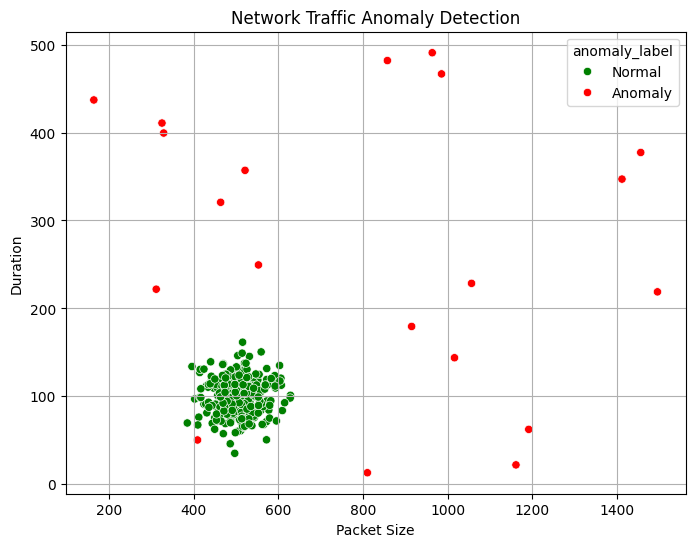

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

# Step 2: Generate Sample Network Traffic Data
def generate_network_traffic_data(n_samples=300, n_anomalies=20):
    np.random.seed(42)
    
    # Normal traffic: [packet_size, duration, src_port]
    normal_data = np.random.normal(loc=[500, 100, 4000], scale=[50, 20, 300], size=(n_samples, 3))
    
    # Anomalous traffic: random spikes or unusual ports
    anomaly_data = np.random.uniform(low=[100, 10, 1000], high=[1500, 500, 9000], size=(n_anomalies, 3))
    
    all_data = np.vstack((normal_data, anomaly_data))
    df = pd.DataFrame(all_data, columns=["packet_size", "duration", "src_port"])
    return df

# Step 3: Apply Isolation Forest
def detect_anomalies(df):
    model = IsolationForest(n_estimators=100, contamination=0.06, random_state=42)
    model.fit(df)
    df['anomaly'] = model.predict(df)
    df['anomaly_label'] = df['anomaly'].map({1: "Normal", -1: "Anomaly"})
    return df

# Step 4: Display Anomalies
def display_results(df):
    print("🔎 Anomaly Count:\n", df['anomaly_label'].value_counts(), "\n")
    print("🚨 Sample Anomalies:\n", df[df['anomaly_label'] == "Anomaly"].head())

    # Optional: 2D Plot (e.g., packet size vs duration)
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df,
        x="packet_size",
        y="duration",
        hue="anomaly_label",
        palette={"Normal": "green", "Anomaly": "red"}
    )
    plt.title("Network Traffic Anomaly Detection")
    plt.xlabel("Packet Size")
    plt.ylabel("Duration")
    plt.grid(True)
    plt.show()

# Run the full pipeline
if __name__ == "__main__":
    df = generate_network_traffic_data()
    df = detect_anomalies(df)
    display_results(df)
